<a id="top"></a>
 <font size="5">BAPC</font>
> 

> * Prepared by Alfredo López
> * alfredo.lopez@scch.at
> 
<hr>
<hr>

# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

import pitsa

,intercept
79,0.5


,intercept
79,0.5


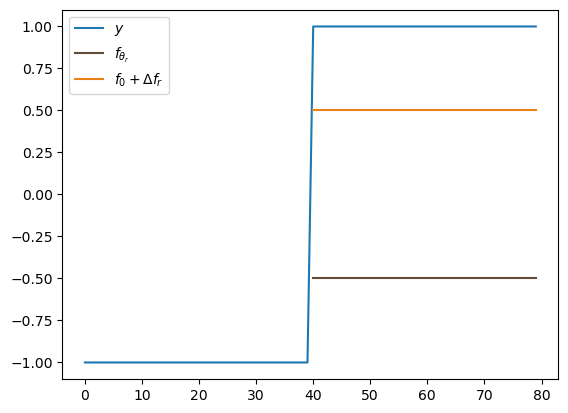

In [2]:
# data
n_samples = 80
tast = 40
y = np.concatenate((-np.ones(tast), np.ones(n_samples-tast)))
t = np.arange(n_samples)

# base model
model = DummyRegressor(strategy="mean")
base_model = pitsa.models.regression.SKLearnModel(model=model)

# correction window
correction_window = 40

# correction model
model = KNeighborsRegressor(n_neighbors=1) #Set n_neighbors=1 for perfect fit
correction_model = pitsa.models.regression.SKLearnModel(model, name='1NN')

# intialize
explainer = pitsa.xai.bapc.Explainer(
base_model=base_model, 
correction_model=correction_model
)

# update
explainer.update(t=t, y=y, correction_window=correction_window)

# plot
explainer.plot()
plt.legend()

# explain
explanation, importance = explainer.explain(t=79)
display(explanation)
display(importance)